In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from graphviz import Source



In [114]:
# Load data
data = pd.read_csv('C:/Users/DELL/Desktop/project advanced/train2.csv')
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [116]:
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [118]:
data.shape
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [120]:
data.fillna(data.mean(), inplace=True)

In [122]:
data.shape


(2000, 21)

In [124]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [126]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [128]:
data['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

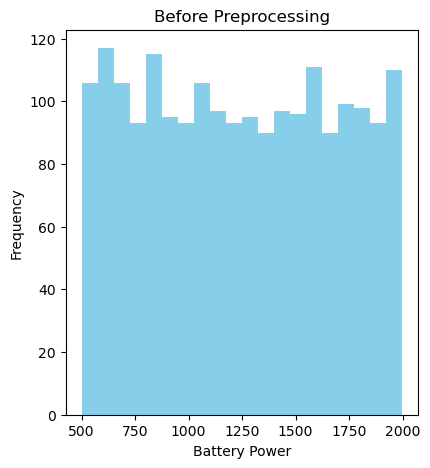

In [130]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['battery_power'], bins=20, color='skyblue')
plt.title('Before Preprocessing')
plt.xlabel('Battery Power')
plt.ylabel('Frequency')

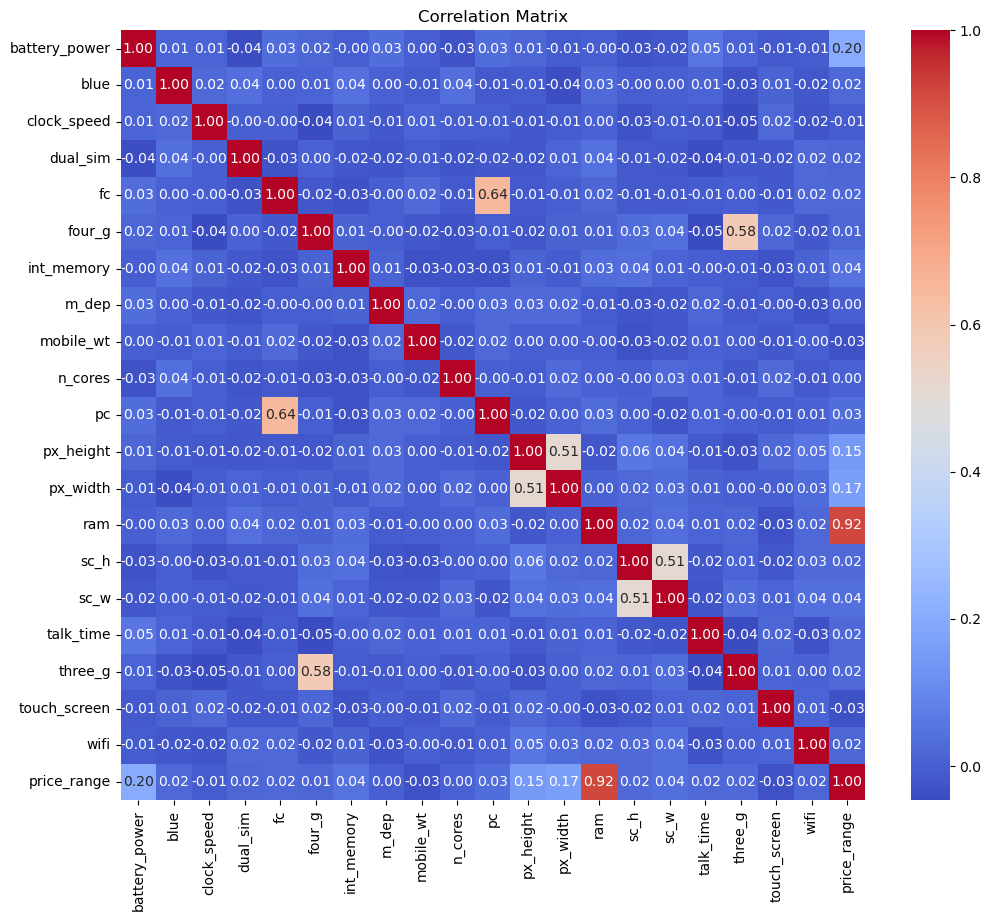

In [131]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Text(0, 0.5, 'Frequency')

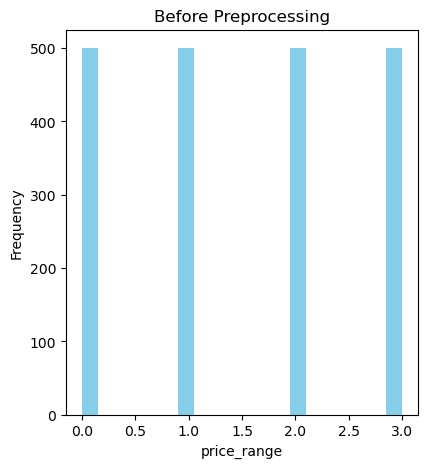

In [133]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['price_range'], bins=20, color='skyblue')
plt.title('Before Preprocessing')
plt.xlabel('price_range')
plt.ylabel('Frequency')

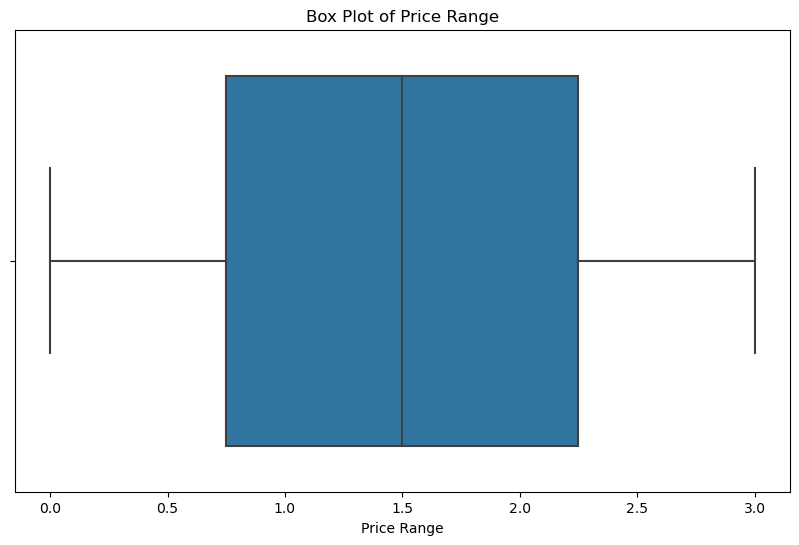

In [134]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["price_range"])
plt.title("Box Plot of Price Range")
plt.xlabel("Price Range")
plt.show()

<Axes: xlabel='blue', ylabel='count'>

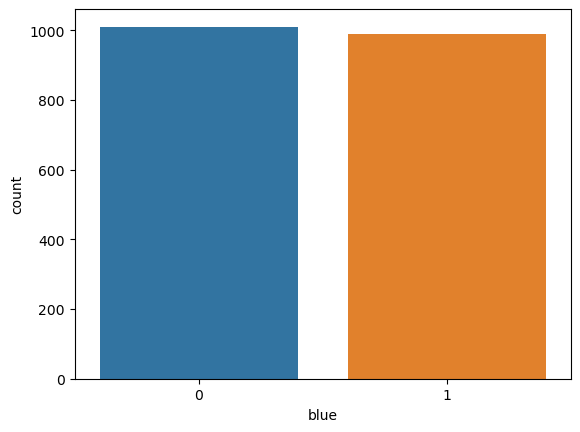

In [135]:
sns.countplot(x='blue',data=data)

<Axes: xlabel='four_g', ylabel='count'>

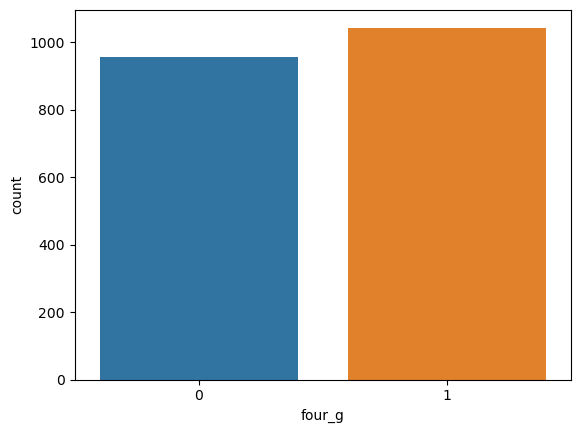

In [136]:
sns.countplot(x='four_g',data=data)

<Axes: xlabel='touch_screen', ylabel='count'>

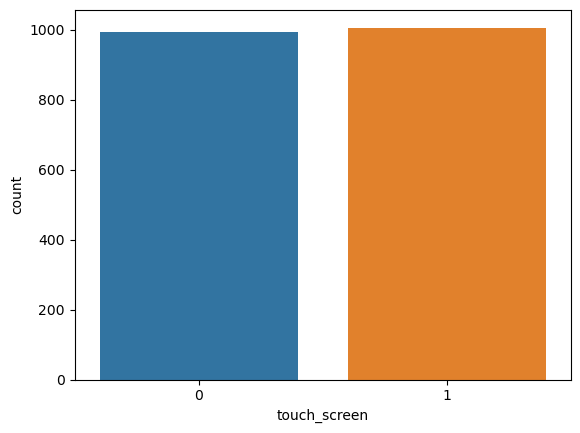

In [139]:
sns.countplot(x='touch_screen',data=data)

<Axes: xlabel='wifi', ylabel='count'>

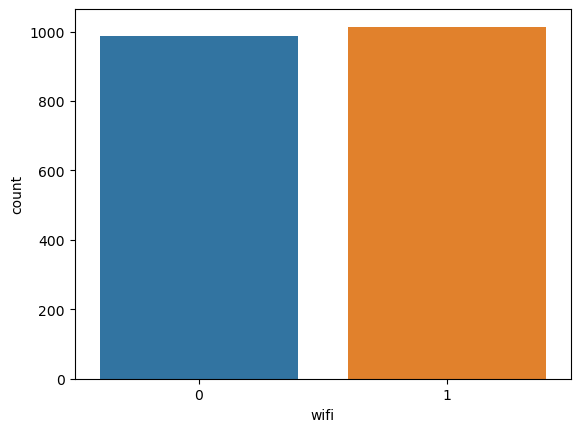

In [141]:
sns.countplot(x='wifi',data=data)

<Axes: xlabel='price_range', ylabel='count'>

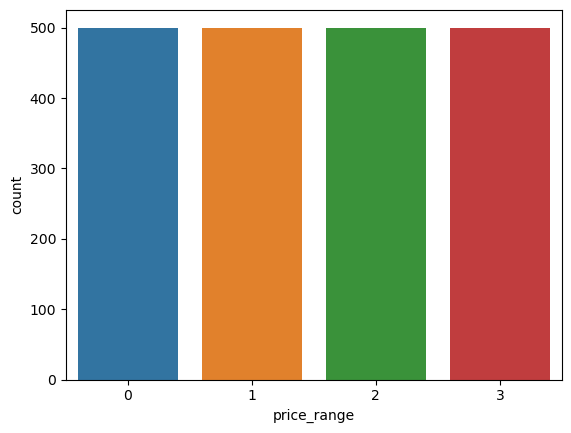

In [145]:
sns.countplot(x='price_range',data=data)

<Axes: xlabel='wifi', ylabel='count'>

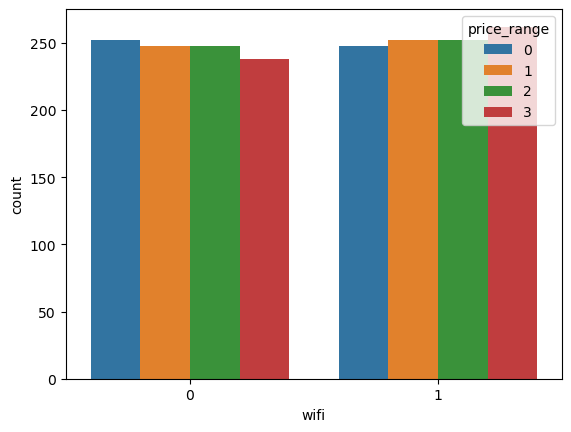

In [148]:
sns.countplot(x='wifi',hue='price_range',data=data)

<Axes: xlabel='touch_screen', ylabel='count'>

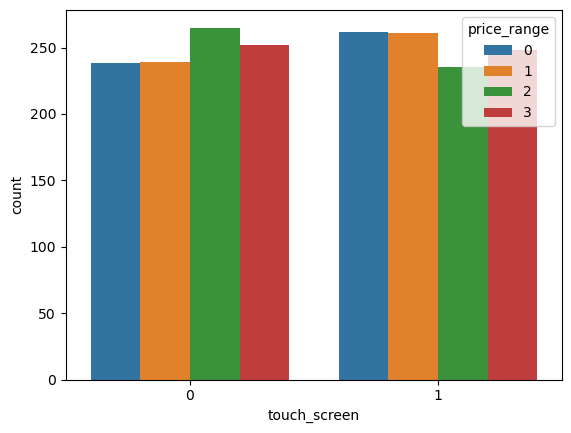

In [149]:
sns.countplot(x='touch_screen',hue='price_range',data=data)

<Axes: xlabel='three_g', ylabel='count'>

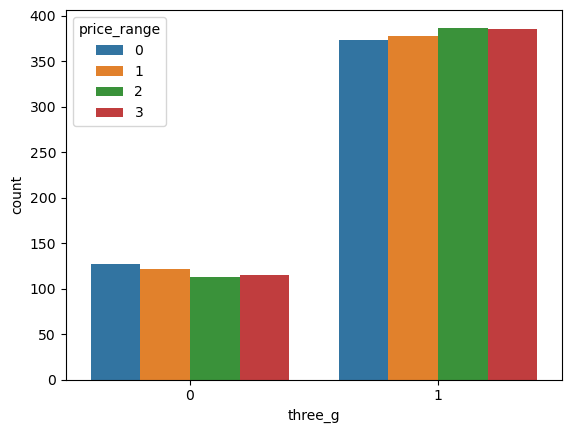

In [151]:
sns.countplot(x='three_g',hue='price_range',data=data)

<Axes: xlabel='four_g', ylabel='count'>

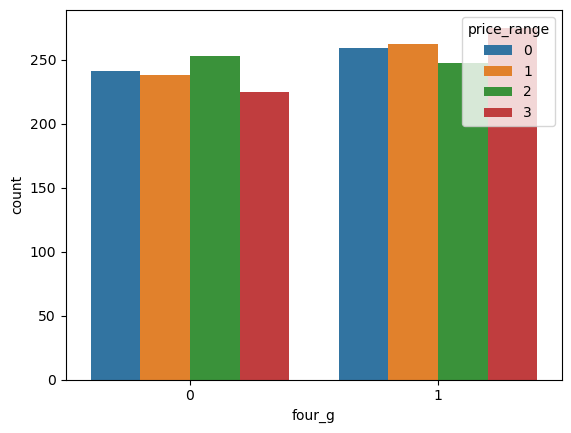

In [153]:
sns.countplot(x='four_g',hue='price_range',data=data)

In [154]:
features = data.columns

def  univ_plot(data, feature, size=20):
    plt.figure(figsize=(10,4))
    
    if data[feature].nunique() > size:
        plt.subplot(1,2,1)
        sns.histplot(data=data, x=feature, kde=True)
        plt.title(f'Histogram - {feature}')

        plt.subplot(1,2,2)
        sns.boxplot(data=data, x=feature)
        plt.title(f'Boxplot - {feature}')
    else:
        sns.countplot(data=data, x=feature)
        plt.title(f'Countplot - {feature}')

    plt.show()
def biv_plot(data, feature, target='price_range', size=20):
    plt.figure(figsize=(10,4))
    
    if feature == target: return
    if data[feature].nunique() > size:
        sns.boxplot(data=data, x=feature, hue=target)
        plt.title(f'Boxplot - {feature} by {target}')
    else:
        sns.countplot(data=data, x=feature, hue=target)
        plt.title(f'Countplot - {target} by {feature}')

    plt.show()

def multiv_plot(data, vars, target='price_range'):
    plt.figure(figsize=(10,4))
    sns.pairplot(data=data, vars=vars, hue='price_range')
    plt.suptitle(f'Features:{vars} by price', y=1.02)
    plt.show()

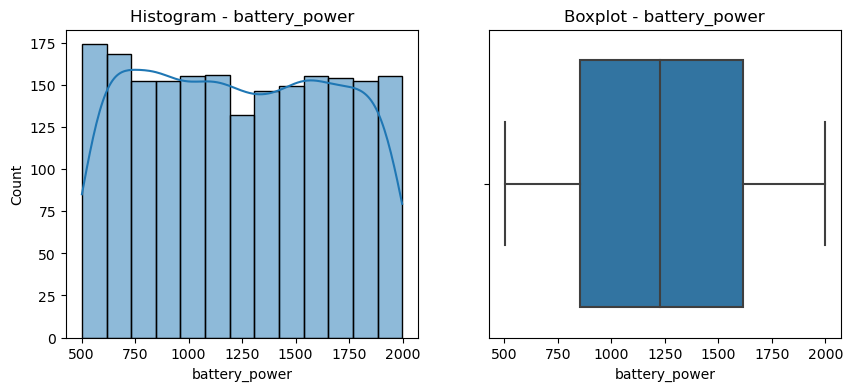

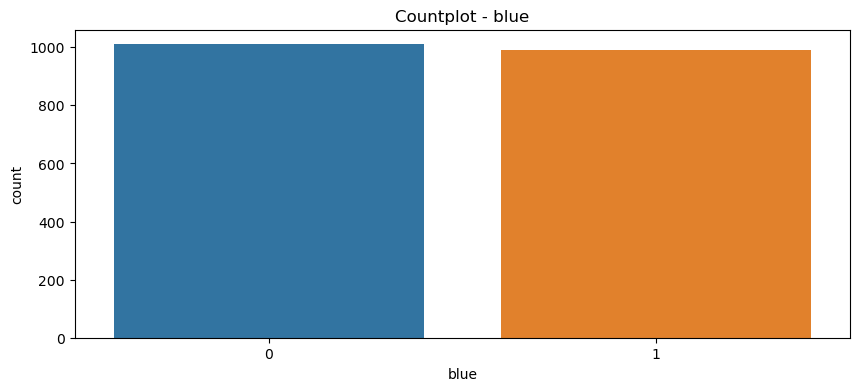

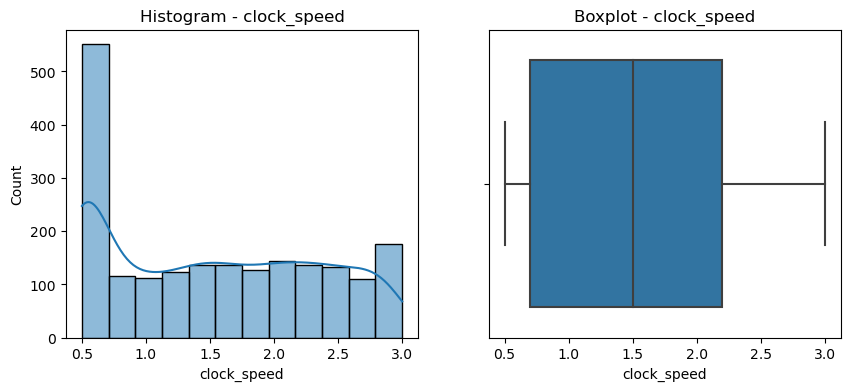

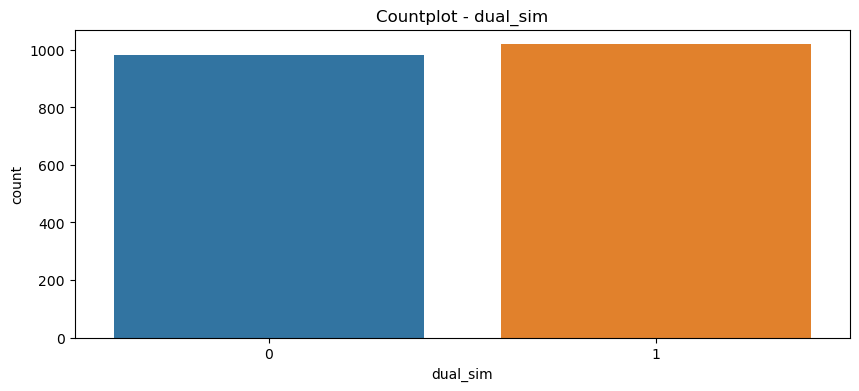

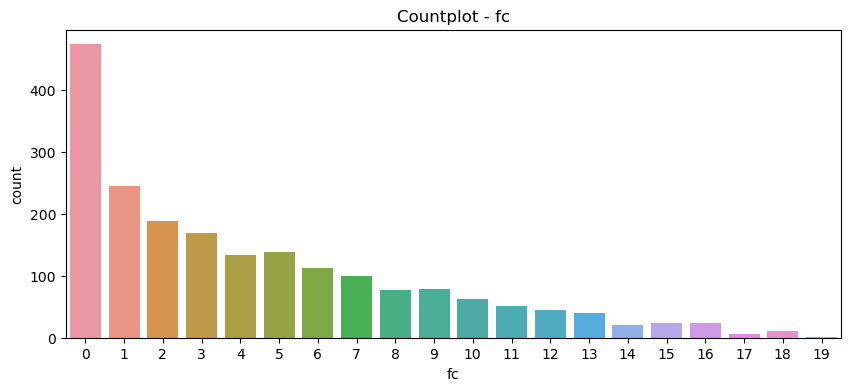

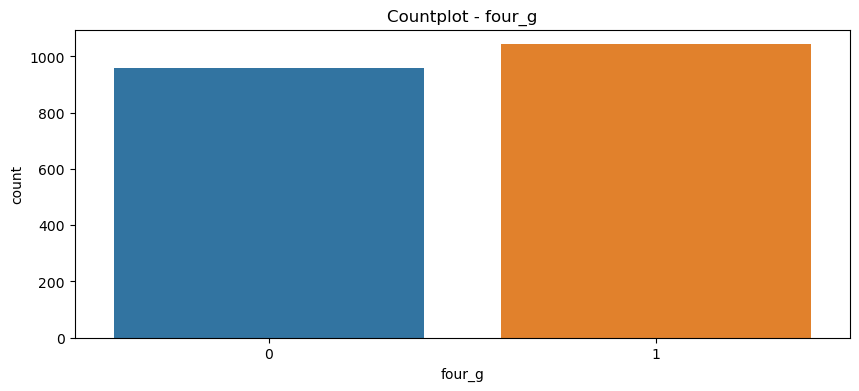

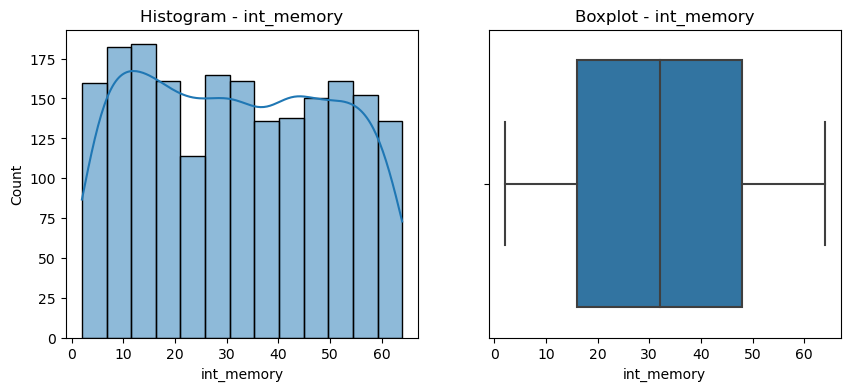

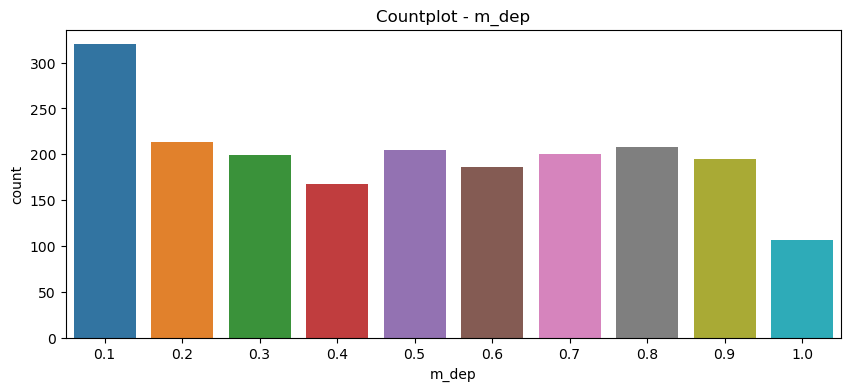

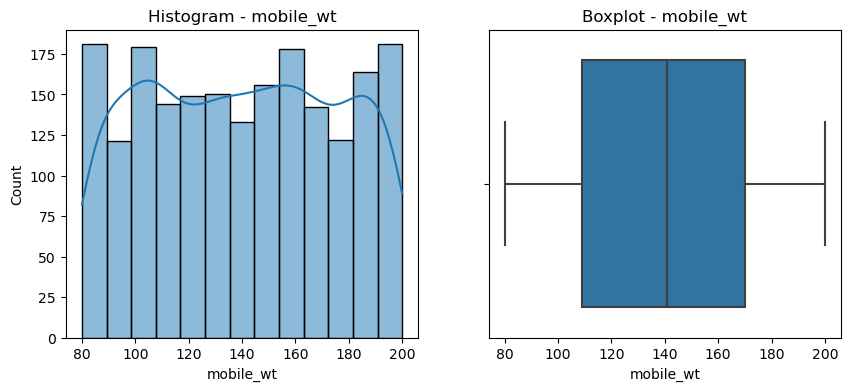

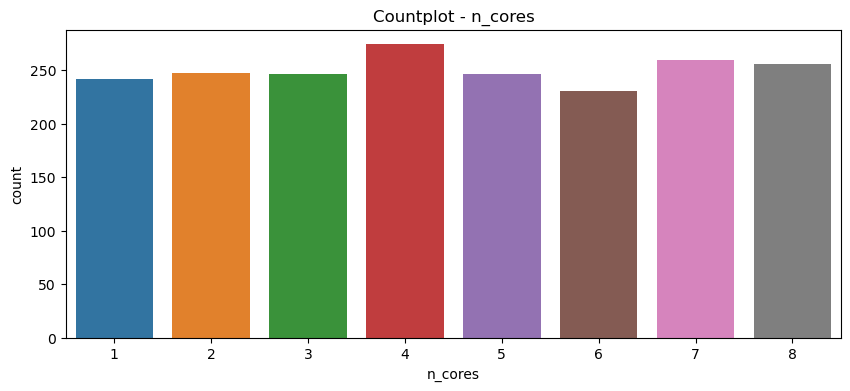

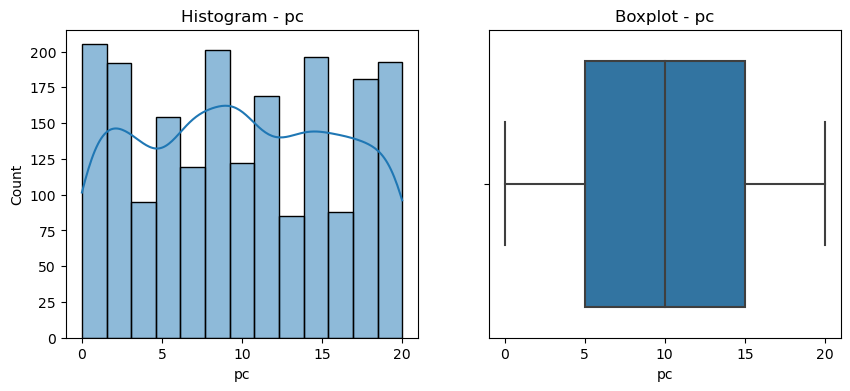

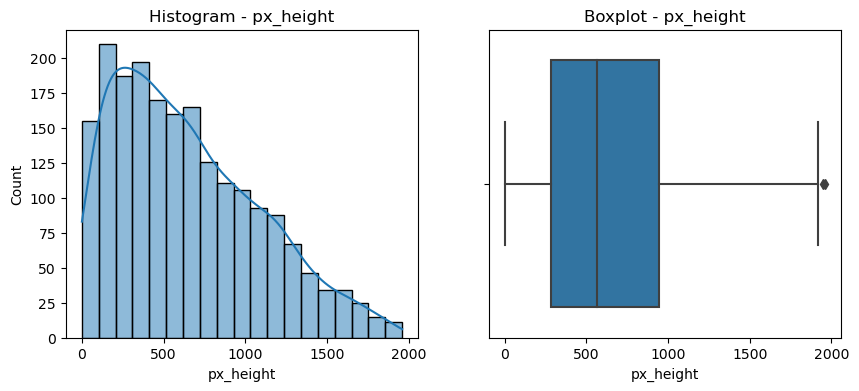

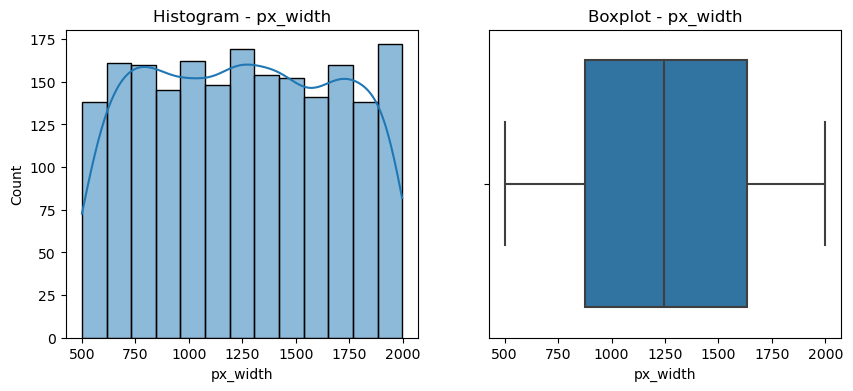

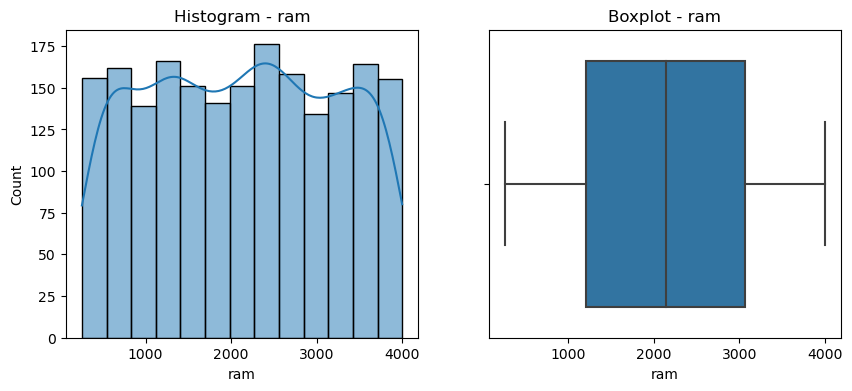

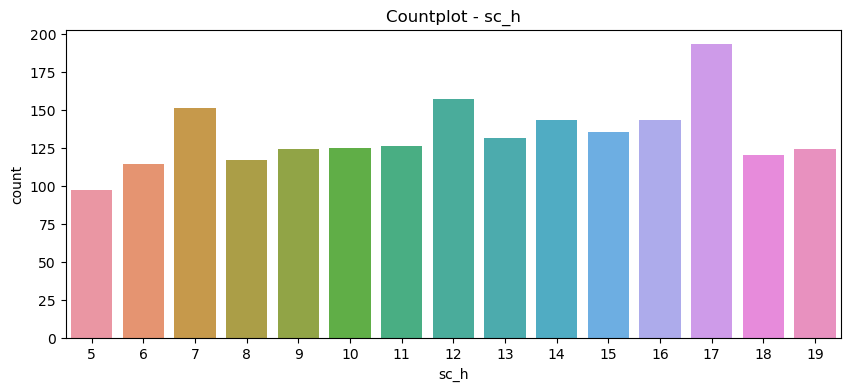

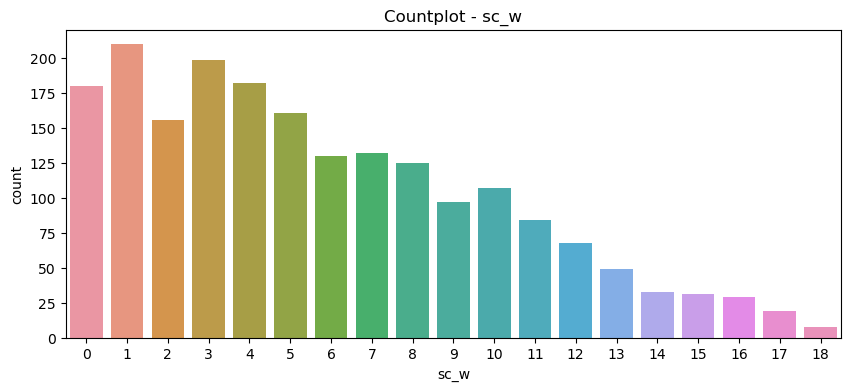

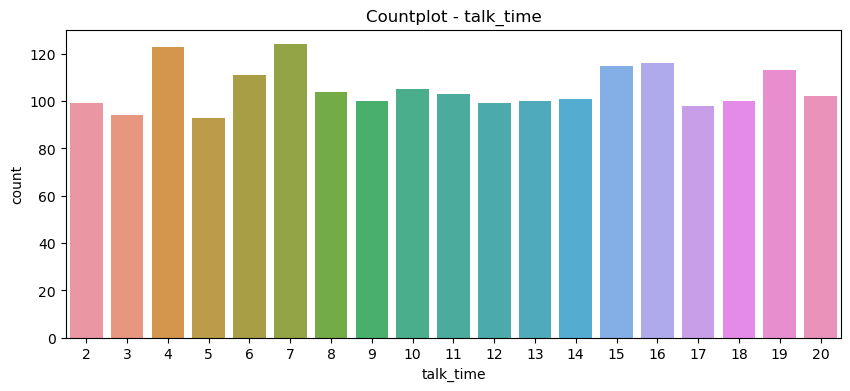

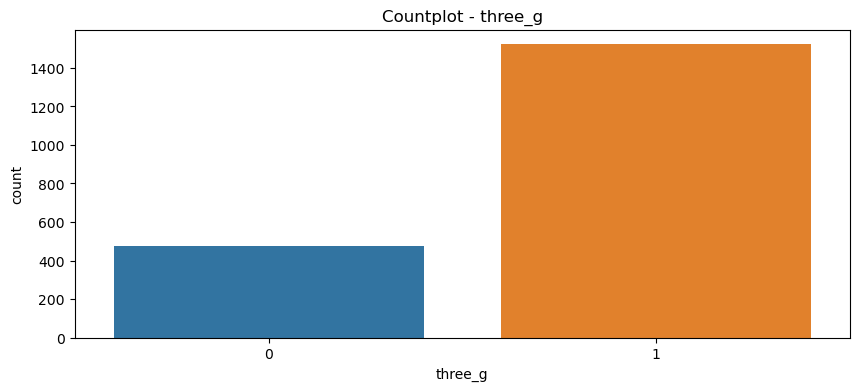

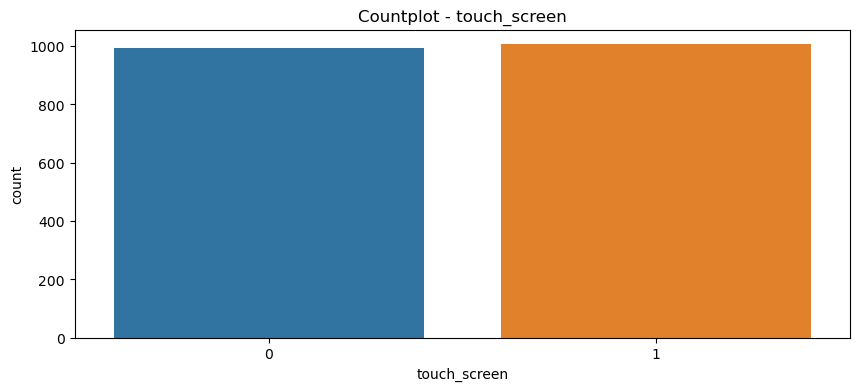

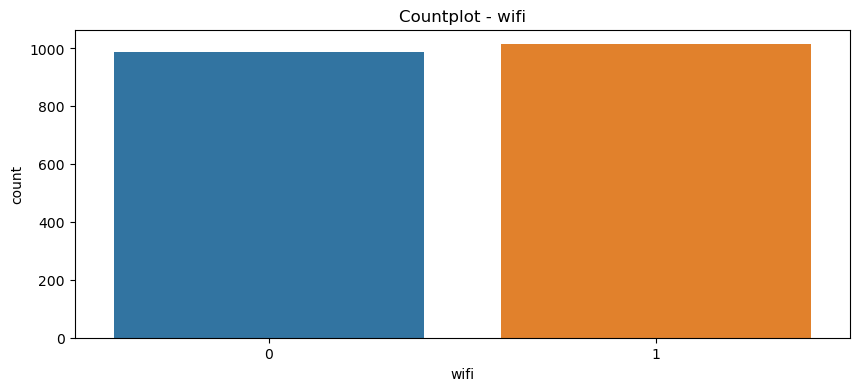

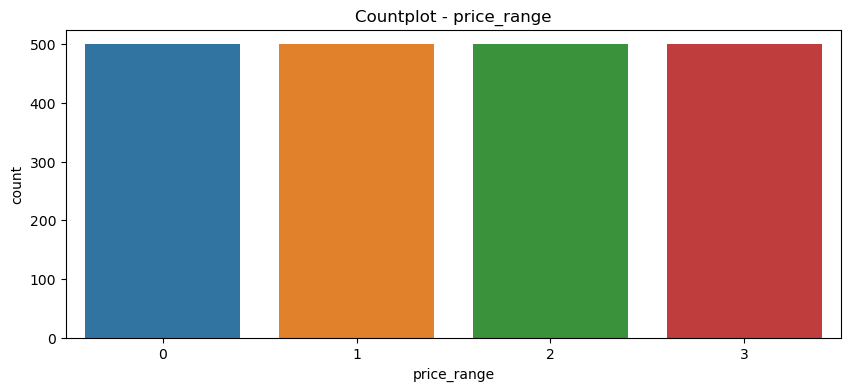

In [156]:
for feature in features:
    univ_plot(data, feature)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x400 with 0 Axes>

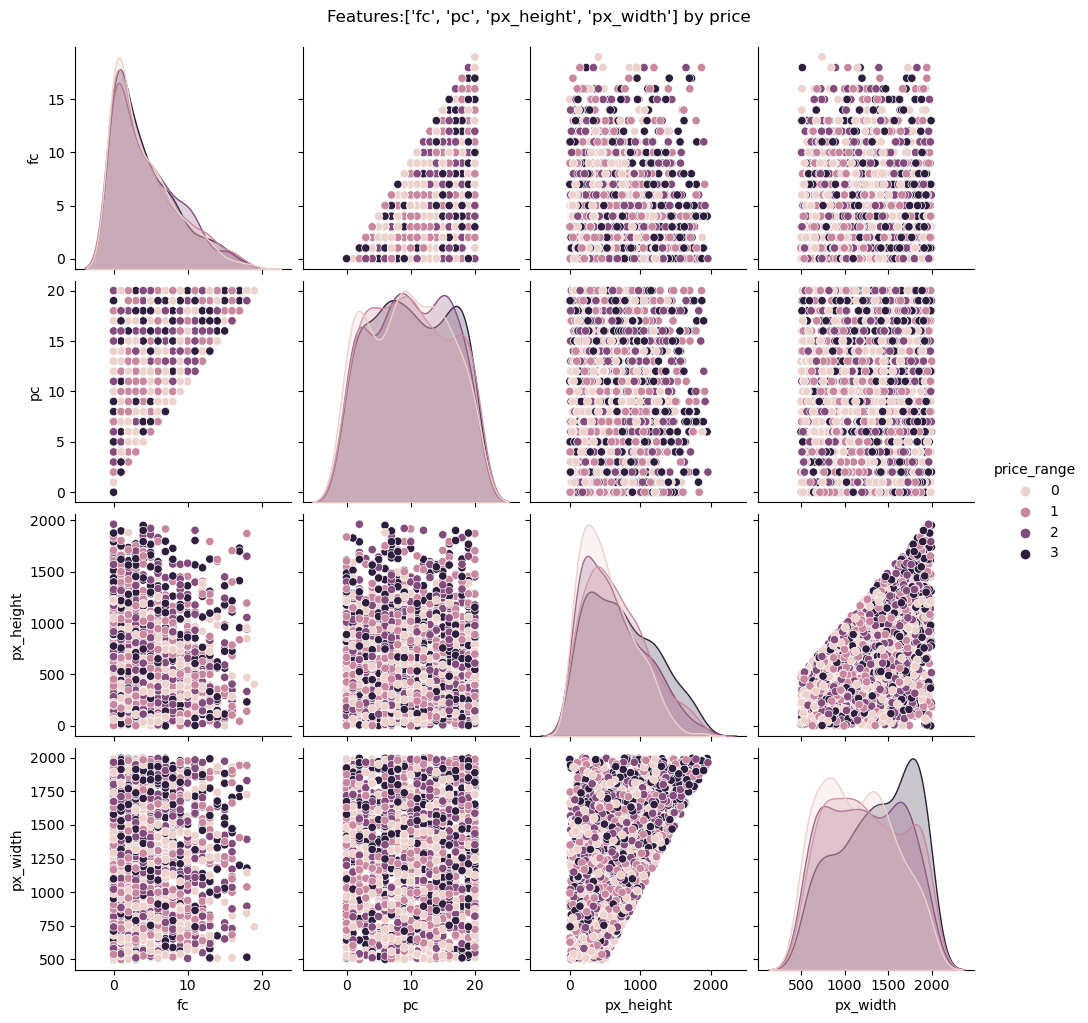

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x400 with 0 Axes>

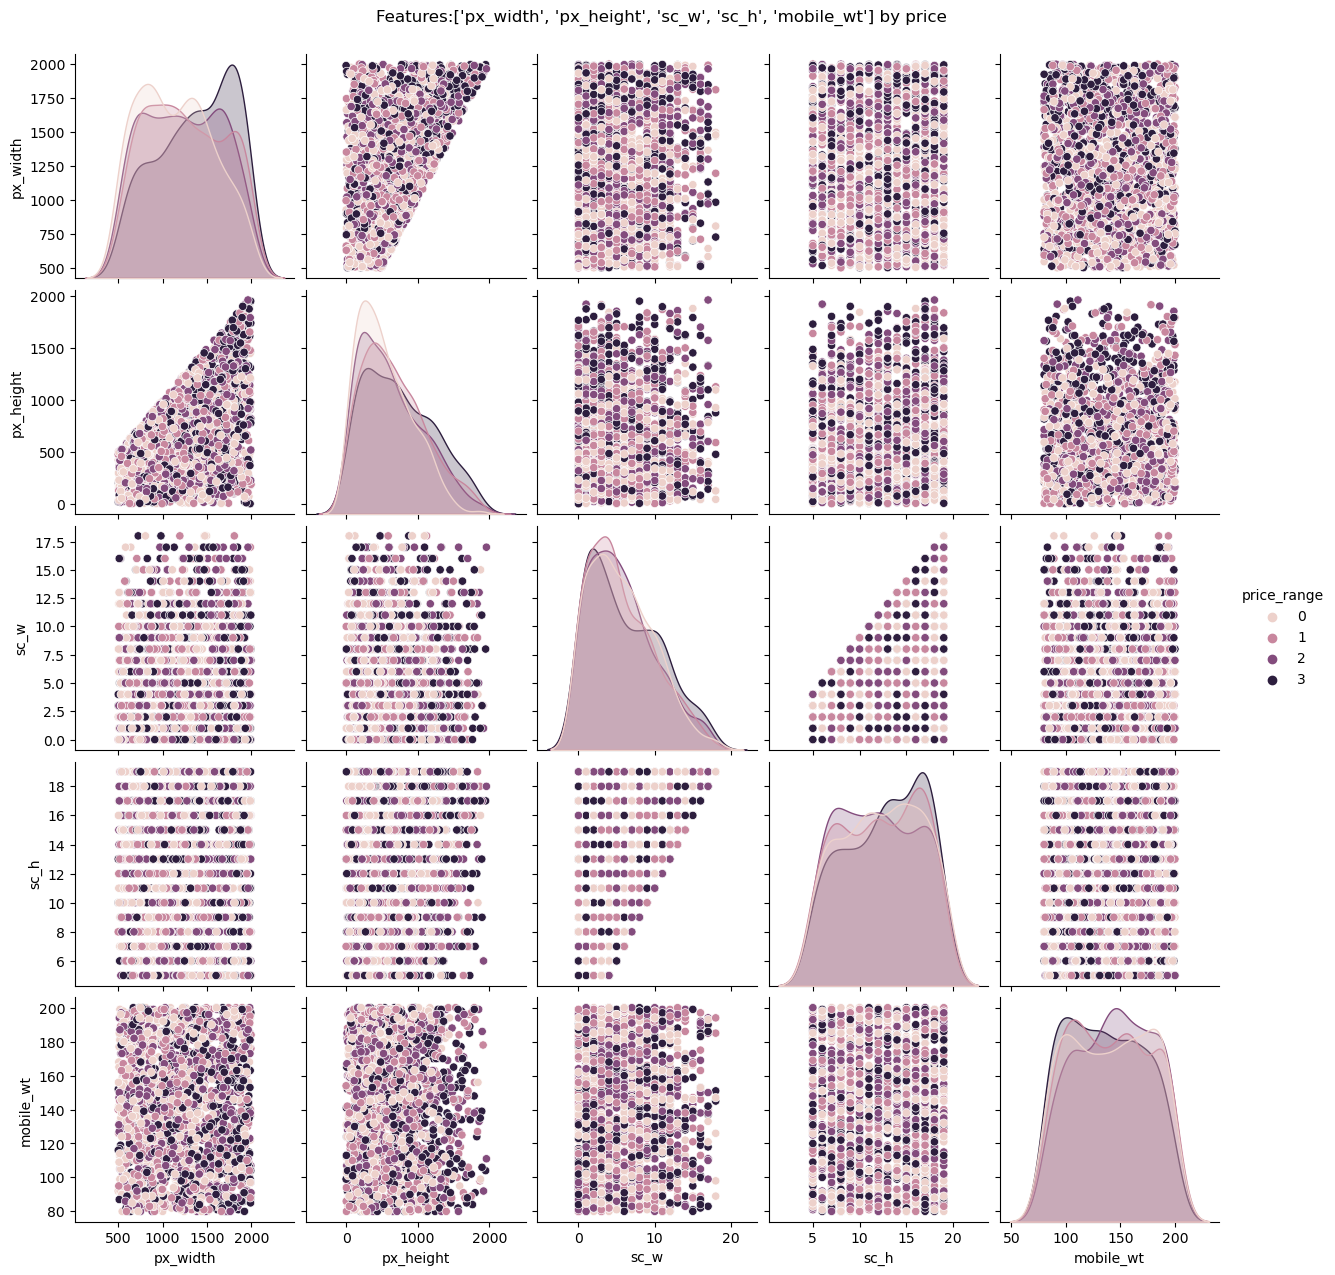

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x400 with 0 Axes>

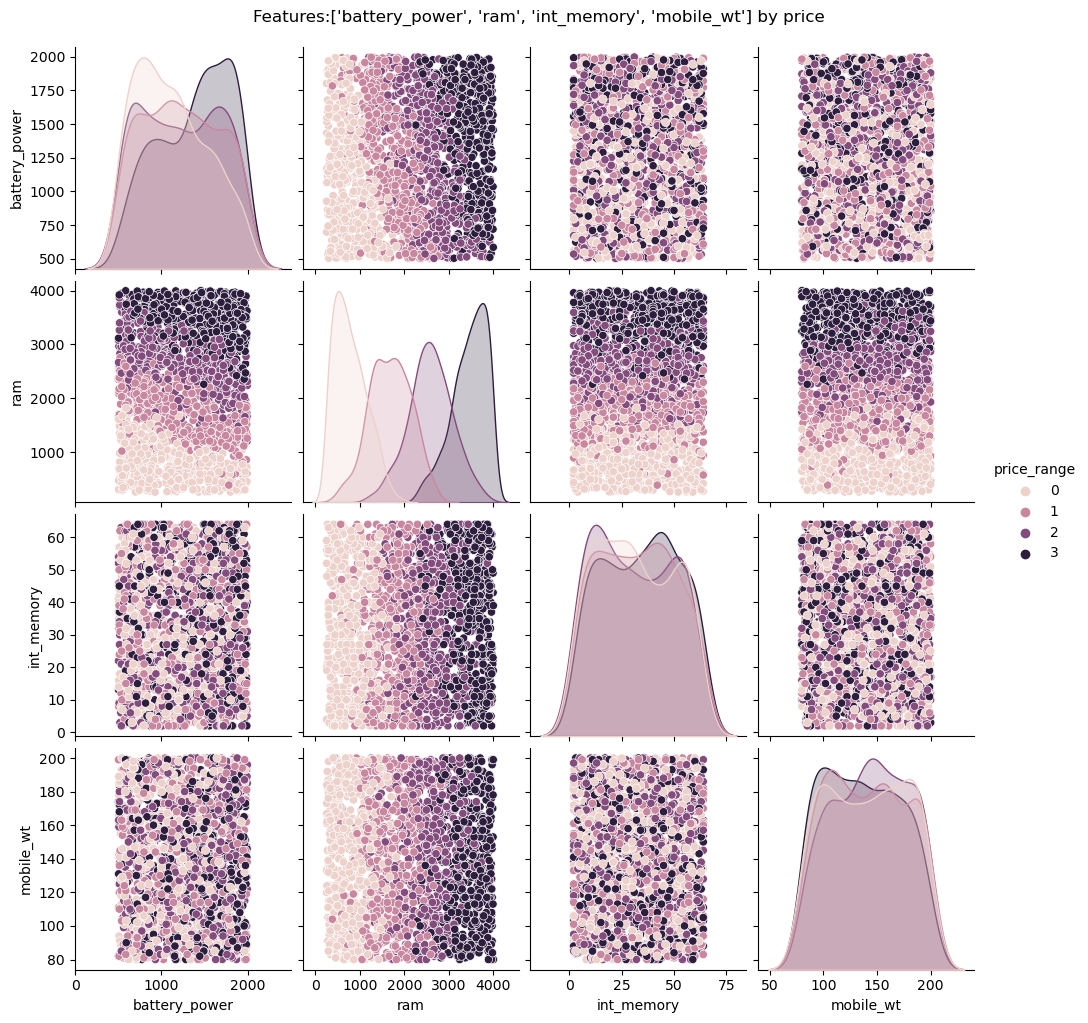

In [159]:
# Multivariate analysis

### Front Camera, Rear Camera, Pixel Height, Pixel Width by Price Range
features = ['fc', 'pc', 'px_height', 'px_width']
multiv_plot(data,features)

### Pixel Width, Pixel Height, Screen Width, Screen Height, Mobile Weight by Price Range
features = ['px_width', 'px_height', 'sc_w', 'sc_h', 'mobile_wt']
multiv_plot(data,features)

### Battery Power, RAM, Internal Memory, Mobile Weight by Price range
features = ['battery_power', 'ram', 'int_memory', 'mobile_wt']
multiv_plot(data, features)

In [160]:
X = data.drop(columns=['price_range', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']) 
Y = data['price_range']  


In [161]:
import random
import tensorflow as tf
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [162]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [163]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 4) (1600, 4) (400, 4)


In [164]:
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,  
    min_samples_split=10,  
    min_samples_leaf=4,  
    splitter='best'
    )

In [165]:
from sklearn.model_selection import cross_val_score
k = 5
scores = cross_val_score(model, X, Y, cv=k)

In [166]:
model.fit(X_train,Y_train,)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=10)

In [167]:
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_predictions)
print('Training-set accuracy score:', train_accuracy)

Training-set accuracy score: 0.9625


In [168]:
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)
print('Test-set accuracy score:', test_accuracy)

Test-set accuracy score: 0.8575


[Text(0.46304460580912865, 0.9545454545454546, 'x[3] <= 2217.5\nentropy = 2.0\nsamples = 1600\nvalue = [395, 409, 408, 388]'),
 Text(0.13900414937759337, 0.8636363636363636, 'x[3] <= 1052.5\nentropy = 1.377\nsamples = 840\nvalue = [395, 357, 88, 0]'),
 Text(0.04149377593360996, 0.7727272727272727, 'x[1] <= 1445.0\nentropy = 0.436\nsamples = 334\nvalue = [304, 30, 0, 0]'),
 Text(0.024896265560165973, 0.6818181818181818, 'x[0] <= 1269.5\nentropy = 0.325\nsamples = 320\nvalue = [301, 19, 0, 0]'),
 Text(0.016597510373443983, 0.5909090909090909, 'entropy = 0.0\nsamples = 172\nvalue = [172, 0, 0, 0]'),
 Text(0.03319502074688797, 0.5909090909090909, 'x[1] <= 472.5\nentropy = 0.553\nsamples = 148\nvalue = [129, 19, 0, 0]'),
 Text(0.024896265560165973, 0.5, 'entropy = 0.0\nsamples = 66\nvalue = [66, 0, 0, 0]'),
 Text(0.04149377593360996, 0.5, 'x[3] <= 773.5\nentropy = 0.781\nsamples = 82\nvalue = [63, 19, 0, 0]'),
 Text(0.016597510373443983, 0.4090909090909091, 'x[2] <= 1639.0\nentropy = 0.469\

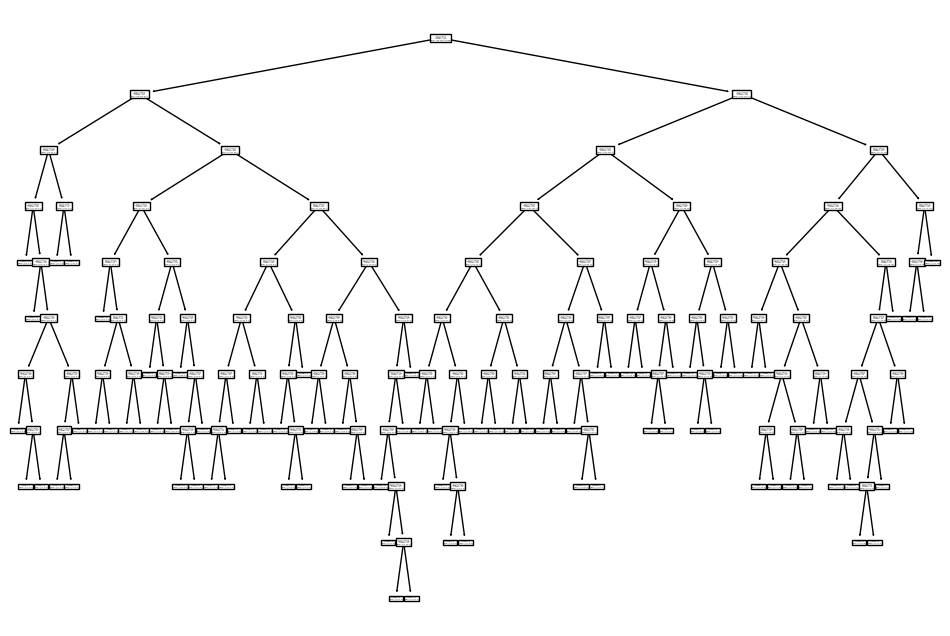

In [169]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model.fit(X_train, Y_train)) 

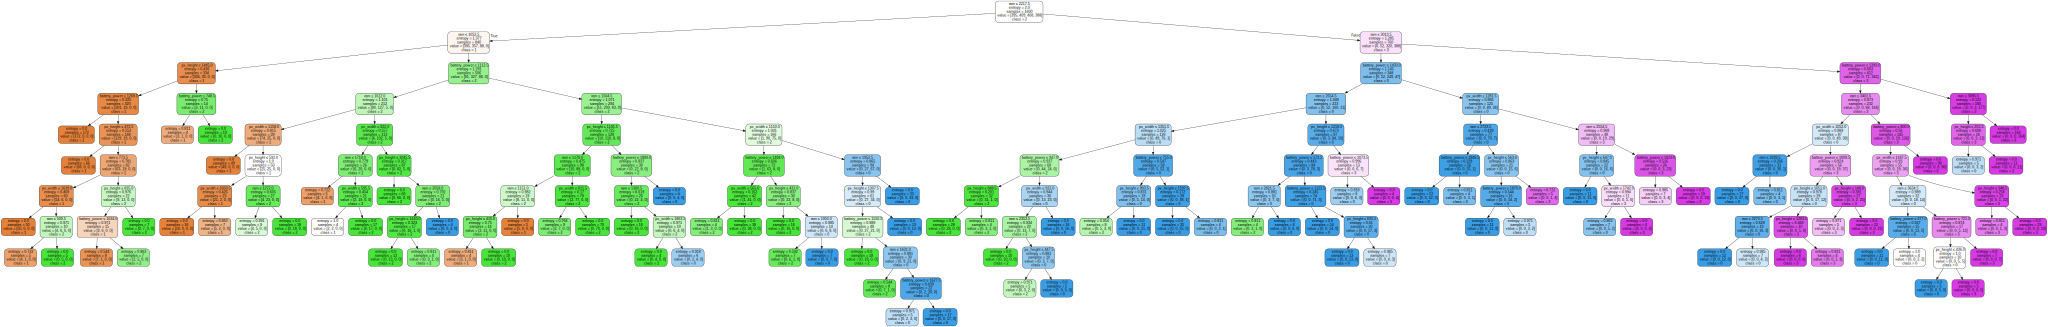

In [170]:
import graphviz 

# Convert class names to strings
class_names = [str(class_label) for class_label in Y_train.unique()]

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=class_names,  
                                filled=True, rounded=True,  
                                special_characters=True)

graph = graphviz.Source(dot_data) 
graph


In [171]:
# Define a range of max_depth values to explore
max_depth_values = range(1, 21)

In [172]:
# Lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

In [174]:
# Iterate over max_depth values
for max_depth in max_depth_values:
    # Initialize the decision tree classifier with current max_depth
    model = DecisionTreeClassifier(max_depth=max_depth)
    
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict on training set
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, train_predictions)
    train_accuracies.append(train_accuracy)
    
    # Predict on test set
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, test_predictions)
    test_accuracies.append(test_accuracy)

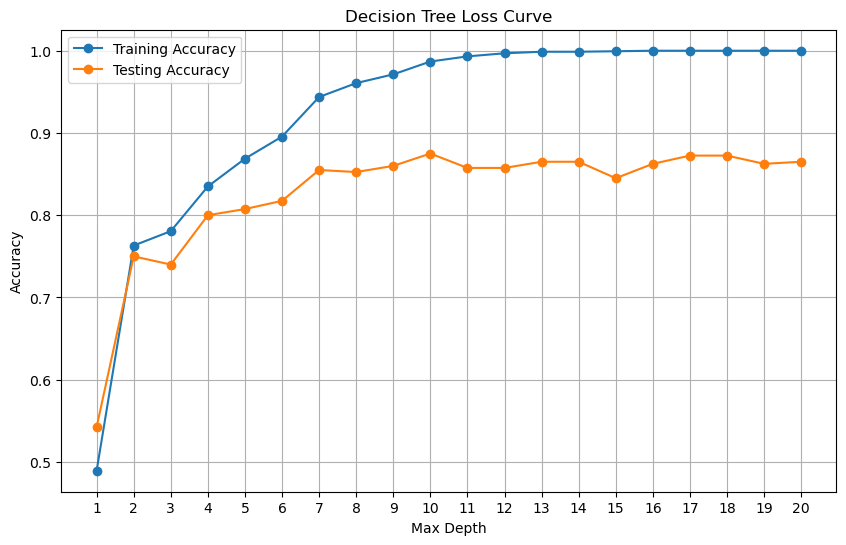

In [175]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_values, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Decision Tree Loss Curve')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()

In [176]:
y_pred = model.predict(X_test)

In [177]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', conf_mat)

Confusion matrix

 [[93 12  0  0]
 [ 3 80  8  0]
 [ 0  9 75  8]
 [ 0  0 14 98]]


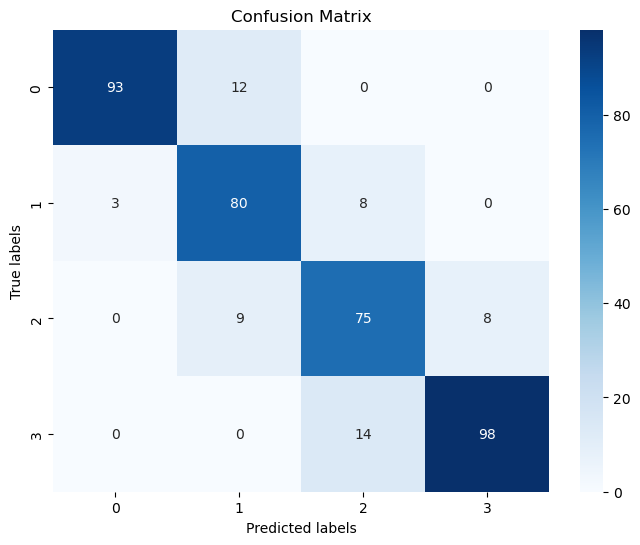

In [178]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [179]:
from sklearn.metrics import roc_curve, auc

n_classes = len(np.unique(Y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((Y_test == i).astype(int), (y_pred == i).astype(int))
    roc_auc[i] = auc(fpr[i], tpr[i])


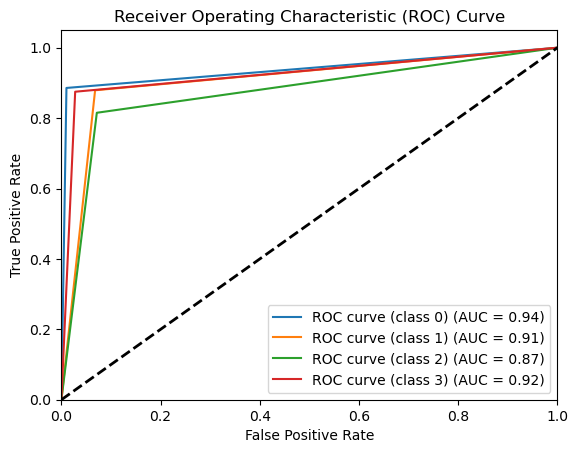

In [180]:
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [181]:
import joblib

# Save the model to a file
joblib.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']